In [ ]:
!pip install chembl_webresource_client
!pip install rdkit_pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 28.6 MB/s eta 0:00:00


We are using ChEMBL. ChEMBL is a manually curated database of bioactive molecules with drug-like properties. We chose single proteins due to their simplicity.

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

HIV protease is an enzyme essential for the maturation of infectious HIV particles. It cleaves newly synthesized polyproteins into functional viral proteins, a critical step in the viral life cycle. Inhibiting this protease disrupts the production of mature virions, thereby reducing viral replication. The significance of targeting HIV protease is highlighted by the development and clinical use of protease inhibitors, which have been pivotal in antiretroviral therapy.


CCR5 serves as a coreceptor that HIV uses to enter host cells, particularly during the early stages of infection. Blocking this receptor can prevent the virus from attaching to and infecting T cells. The critical role of CCR5 in HIV infection is highlighted by the observation that individuals with certain mutations in the CCR5 gene exhibit resistance to HIV. This has led to therapeutic strategies aimed at inhibiting CCR5 to prevent HIV entry into cells.

KAT5, also known as Tip60, is a histone acetyltransferase involved in various cellular processes, including DNA repair and gene expression regulation. KAT5 has been shown to interact with the HIV-1 Tat protein, enhancing viral transcription and replication. Targeting KAT5 could disrupt this interaction, potentially reducing HIV replication.


In [ ]:
# Histone Acetyltransferase KAT5 (https://en.wikipedia.org/wiki/KAT5 Index 6
# C-C chemokine Receptor Type 5 (https://pmc.ncbi.nlm.nih.gov/articles/PMC3185609/) Index 3
# HIV Protease (https://pubmed.ncbi.nlm.nih.gov/3290901/) Index 0

# Search for HIV-related targets
target = new_client.target
target_query = target.search('HIV')

# Convert the query result to a DataFrame and display the first 10 rows
targets = pd.DataFrame.from_dict(target_query)
targets.head(40)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Human immunodeficiency virus,HIV protease,19.0,False,CHEMBL3638323,"[{'accession': 'Q9YQ30', 'component_descriptio...",SINGLE PROTEIN,12721
1,[],HIV-1 M:B_Lai,HIV-1 M:B_Lai,14.0,False,CHEMBL612775,[],ORGANISM,290579
2,[],Homo sapiens,Transcription factor HIVEP2,12.0,False,CHEMBL4523214,"[{'accession': 'P31629', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,C-C chemokine receptor type 5,11.0,False,CHEMBL274,"[{'accession': 'P51681', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Ubiquitin thioesterase OTU1,11.0,False,CHEMBL4630833,"[{'accession': 'Q5VVQ6', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,DDB1- and CUL4-associated factor 1,11.0,False,CHEMBL5465521,"[{'accession': 'Q9Y4B6', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Histone acetyltransferase KAT5,9.0,False,CHEMBL5750,"[{'accession': 'Q92993', 'component_descriptio...",SINGLE PROTEIN,9606
7,[],Homo sapiens,DCAF1-BRD9,9.0,False,CHEMBL5465396,"[{'accession': 'Q9H8M2', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,Human immunodeficiency virus type I enhancer-b...,8.0,False,CHEMBL2909,"[{'accession': 'P15822', 'component_descriptio...",SINGLE PROTEIN,9606
9,[],Homo sapiens,CCR5/mu opioid receptor complex,8.0,False,CHEMBL3301384,"[{'accession': 'P51681', 'component_descriptio...",PROTEIN COMPLEX,9606


In [ ]:
#ID: 0
selected_target = targets.target_chembl_id[0]
selected_target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df_protease = pd.DataFrame.from_dict(res)
df_protease

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,251760,17634991,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.995
1,None,251761,17634992,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,2.024
2,None,251762,17634993,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.599
3,None,251763,17634994,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.6
4,None,251764,17634995,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.29
5,None,251765,17634996,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,1.417
6,None,251766,17634997,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,1.286
7,None,251767,17634998,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,1.353
8,None,251768,17634999,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,4.122
9,None,251769,17635000,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,5.212


In [ ]:
# ID: 3
selected_target = targets.target_chembl_id[3]
selected_target

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df_ccr5 = pd.DataFrame.from_dict(res)




In [ ]:
#ID: 6
selected_target = targets.target_chembl_id[6]
selected_target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df_kat5 = pd.DataFrame.from_dict(res)
df_kat5

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,2490443,[],CHEMBL1029727,Inhibition of TIP60 in human HeLa cell extract...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,9.0
1,None,None,2490445,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,143.35
2,None,None,2490449,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,111.7
3,None,None,2490453,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,25.87
4,None,None,2490457,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,17.3
5,None,None,2490461,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,20.91
6,None,None,2490465,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,79.62
7,None,None,2490469,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,29.75
8,None,None,2490473,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,374.59
9,None,None,2490477,[],CHEMBL1025546,Inhibition of recombinant Tip60 (1-513) expres...,B,None,None,BAO_0000190,...,Homo sapiens,Histone acetyltransferase KAT5,9606,None,None,IC50,uM,UO_0000065,None,200.0


In [ ]:
df_protease.to_csv('protease_bioactivity_data.csv', index=False)
df_ccr5.to_csv('ccr5_bioactivity_data.csv', index=False)
df_kat5.to_csv('kat5_bioactivity_data.csv', index=False)

In [ ]:
# compounds are either active, inactive, or intermediate based on their standard_value
# Different targets will have different thresholds for active, inactive, and intermediate
def bioactivity_classifier(lower_bound, upper_bound, df):
  bioactivity_class = []
  for i in df['standard_value']:
    if float(i) >= upper_bound:
      bioactivity_class.append("inactive")
    elif float(i) <= lower_bound:
      bioactivity_class.append("active")
    else:
      bioactivity_class.append("intermediate")
    if pd.isna(bioactivity_class[-1]):
      print('Nan appended', i)
  bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
  return bioactivity_class

In [ ]:
selected_columns = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']


In [ ]:
# Preprocess for HIV protease
# Bioactivity threshold values come from https://www.ncbi.nlm.nih.gov/books/NBK548893/
preprocessed_df_protease = pd.concat(
    [df_protease[selected_columns], bioactivity_classifier(0.60, 0.95, df_protease)],
    axis=1
)


# Preprocess for Histone acetyltransferase KAT5
# Bioactivity threshold values come from https://clinicalepigeneticsjournal.biomedcentral.com/articles/10.1186/s13148-019-0620-1
preprocessed_df_kat5 = pd.concat(
    [df_kat5[selected_columns], bioactivity_classifier(7500, 10500, df_kat5)],
    axis=1
)




In [ ]:
df_kat5['standard_value']

,standard_value
0,9000.0
1,143350.0
2,111700.0
3,25870.0
4,17300.0
5,20910.0
6,79620.0
7,29750.0
8,374590.0
9,200000.0


In [ ]:
# Preprocess for C-C chemokine receptor type 5
# Bioactivity threshold values come from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3168031#:~:text=CCR5%20antagonists
preprocessed_df_ccr5 = pd.concat(
    [df_kat5[selected_columns], bioactivity_classifier(8500, 10500, df_kat5)],
    axis=1
)



In [ ]:
preprocessed_df_kat5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL455368,C=CC/C=C\C/C=C\CCCCCCCc1cccc(O)c1C(=O)O,9000.0,intermediate
1,CHEMBL505605,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,143350.0,inactive
2,CHEMBL448227,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,111700.0,inactive
3,CHEMBL500256,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,25870.0,inactive
4,CHEMBL504265,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,17300.0,inactive
5,CHEMBL509144,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,20910.0,inactive
6,CHEMBL526343,CC(=O)N[C@@H](C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N...,79620.0,inactive
7,CHEMBL505121,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...,29750.0,inactive
8,CHEMBL455368,C=CC/C=C\C/C=C\CCCCCCCc1cccc(O)c1C(=O)O,374590.0,inactive
9,CHEMBL116438,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,200000.0,inactive


In [ ]:
preprocessed_df_protease

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL3670888,CC(C)CN(Sc1ccc2c(c1)CCO2)[C@H](CO)CCCCNC(=O)[C...,0.995,inactive
1,CHEMBL3670889,CC(C)CN(Sc1ccc2c(c1)OCCO2)[C@H](CO)CCCCNC(=O)[...,2.024,inactive
2,CHEMBL3670890,CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...,0.599,active
3,CHEMBL3670886,Cc1c(O)cccc1C(=O)N[C@@H](Cc1ccccc1Br)C(=O)NCCC...,0.6,active
4,CHEMBL3670887,CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...,0.29,active
5,CHEMBL3670897,Cc1ccccc1C[C@H](NC(=O)c1cccnc1)C(=O)NCCCC[C@@H...,1.417,inactive
6,CHEMBL3670829,O=C(O)CNC(=O)c1c(=O)oc(O)c2cc(Br)ccc12,1.286,inactive
7,CHEMBL3670898,C[C@H](NC(=O)c1c(=O)oc(O)c2cccc(-c3cccc(C(F)(F...,1.353,inactive
8,CHEMBL3670899,Cc1ccccc1C[C@H](NC(=O)c1cccc(C)c1O)C(=O)NCCCC[...,4.122,inactive
9,CHEMBL3670901,COC(=O)N[C@@H](CC1CCCCC1)C(=O)NCCCC[C@@H](CO)N...,5.212,inactive


In [ ]:
preprocessed_df_ccr5


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL455368,C=CC/C=C\C/C=C\CCCCCCCc1cccc(O)c1C(=O)O,9000.0,intermediate
1,CHEMBL505605,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,143350.0,inactive
2,CHEMBL448227,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,111700.0,inactive
3,CHEMBL500256,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,25870.0,inactive
4,CHEMBL504265,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,17300.0,inactive
5,CHEMBL509144,CC(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CCCNC(=N)...,20910.0,inactive
6,CHEMBL526343,CC(=O)N[C@@H](C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N...,79620.0,inactive
7,CHEMBL505121,CC(=O)N[C@@H](CCCCNC(=O)CSCCNC(=O)CCNC(=O)[C@H...,29750.0,inactive
8,CHEMBL455368,C=CC/C=C\C/C=C\CCCCCCCc1cccc(O)c1C(=O)O,374590.0,inactive
9,CHEMBL116438,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,200000.0,inactive


In [ ]:
preprocessed_df_protease.to_csv('preprocessed_protease_bioactivity_data', index=False)
preprocessed_df_ccr5.to_csv('preprocessed_ccr5_bioactivity_data')
preprocessed_df_kat5.to_csv('preprocessed_kat5_bioactivity_data')

In [ ]:
# Exploratory Data Analysis

# Import Data if necessary (The target selection code runtime varies)
try:
    preprocessed_df_protease
except NameError:
    preprocessed_df_protease = pd.read_csv('preprocessed_protease_bioactivity_data.csv')

try:
    preprocessed_df_ccr5
except NameError:
    preprocessed_df_ccr5 = pd.read_csv('preprocessed_ccr5_bioactivity_data.csv')

try:
    preprocessed_df_kat5
except NameError:
    preprocessed_df_kat5 = pd.read_csv('preprocessed_kat5_bioactivity_data.csv')


In [ ]:
# Calculate Lipinski Descriptors

# Lipinski Descriptors are rules of thumb for how drug-like compounds are. In other words, how likely it is that they can be turned into a pill that can be taken orally to treat an illness of some kind. They provide a top-level view of molecules' properties (molecular weight, water affinity, and number of hydrogen bond donors and acceptors) and can be used to distinguish between drugs marked active, intermediate, and inactive from above.

def lipinski(smiles, verbose=False):
    # SMILES is a string representation for molecules that encodes information about their physical structure
    # The Chem library can understand the information about molecules' structure that SMILES gives
    molecular_data = []
    for elem in smiles:
        molecule = Chem.MolFromSmiles(elem)
        molecular_data.append(molecule)

    baseData = np.empty((0, 4))


    for molecule in molecular_data:
        # Molecular Weight
        desc_MolWt = Descriptors.MolWt(molecule)
        # Water Affinity
        desc_MolLogP = Descriptors.MolLogP(molecule)
        # Number of Hydrogen bond donors in the molecule
        desc_NumHDonors = Lipinski.NumHDonors(molecule)
        # Number of Hydrogen bond acceptors in the molecule
        desc_NumHAcceptors = Lipinski.NumHAcceptors(molecule)

        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

        if baseData.size:
            baseData = np.vstack([baseData, row])
        else:
            baseData = row

    columnNames = ["MW", "LogP", "NumDonors", "NumAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [ ]:
protease_lipinski = lipinski(preprocessed_df_protease.canonical_smiles)
protease_lipinski_and_standard = pd.concat([preprocessed_df_protease, protease_lipinski], axis=1)

ccr5_lipinski = lipinski(preprocessed_df_ccr5.canonical_smiles)
ccr5_lipinski_and_standard = pd.concat([preprocessed_df_ccr5, ccr5_lipinski], axis=1)

kat5_lipinski = lipinski(preprocessed_df_kat5.canonical_smiles)
kat5_lipinski_and_standard = pd.concat([preprocessed_df_kat5, kat5_lipinski], axis=1)

In [ ]:
def pIC50(input):
  pIC50 = []

  for i in input['standard_value_norm']:
    molar = float(i)/(10**9) #nanomolar to molar
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop(columns=['standard_value_norm'])

  return x

In [ ]:
def norm_value(input):
  norm = []
  for i in input['standard_value']:
    if float(i) > 100000000:
      i = "100000000"
    norm.append(i)

  input['standard_value_norm'] = norm
  x = input.drop(columns=['standard_value'])

  return x

In [ ]:
#protease_norm = norm_value(protease_lipinski_and_standard)
#ccr5_norm = norm_value(ccr5_lipinski_and_standard)
#kat5_norm = norm_value(kat5_lipinski_and_standard)

In [ ]:
protease_norm = norm_value(protease_lipinski_and_standard)
ccr5_norm = norm_value(ccr5_lipinski_and_standard)
kat5_norm = norm_value(kat5_lipinski_and_standard)

In [ ]:
protease_final = pIC50(protease_norm)
ccr5_final= pIC50(ccr5_norm)
kat5_final = pIC50(kat5_norm)

<ipython-input-25-8eb608afe579>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=protease_final, edgecolor='black', palette = ["C0", "C1", "C2"])


Text(0.5, 1.0, 'Frequency of each Bioactivity Class for Protease')

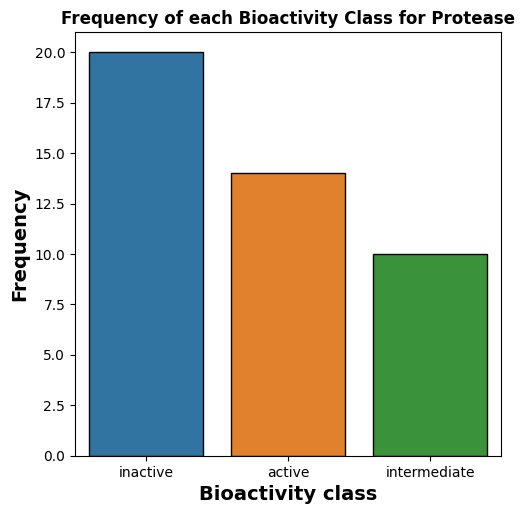

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x='bioactivity_class', data=protease_final, edgecolor='black', palette = ["C0", "C1", "C2"])
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title("Frequency of each Bioactivity Class for Protease", fontweight='bold')

<ipython-input-27-59ef245b92a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=ccr5_final, edgecolor='black', palette = ["C0", "C1", "C2"])


Text(0.5, 1.0, 'Frequency of each Bioactivity Class for CCR5')

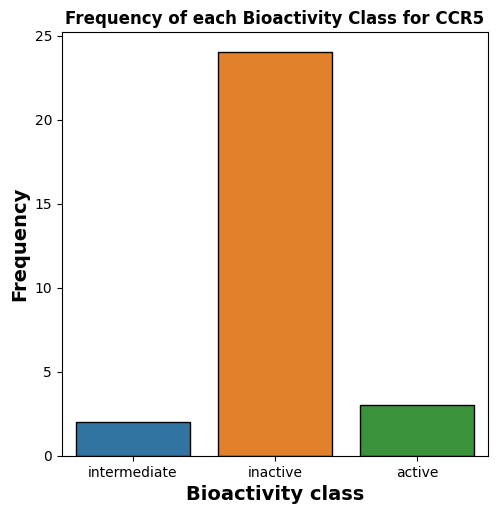

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x='bioactivity_class', data=ccr5_final, edgecolor='black', palette = ["C0", "C1", "C2"])
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title("Frequency of each Bioactivity Class for CCR5", fontweight='bold')

<ipython-input-28-376a813c7ce5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=kat5_final, edgecolor='black', palette = ["C0", "C1", "C2"])


Text(0.5, 1.0, 'Frequency of each Bioactivity Class for KAT5')

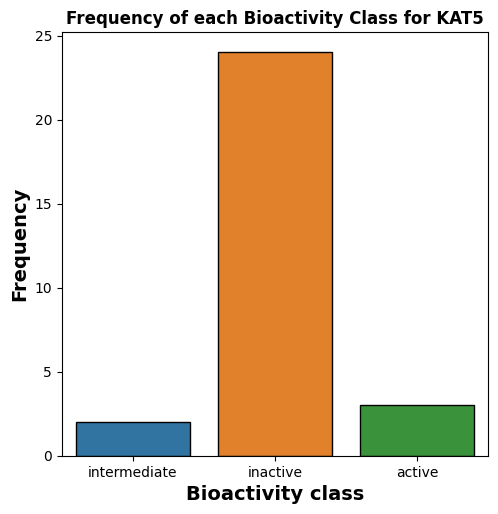

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x='bioactivity_class', data=kat5_final, edgecolor='black', palette = ["C0", "C1", "C2"])
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title("Frequency of each Bioactivity Class for KAT5", fontweight='bold')

In [ ]:
protease_final.to_csv('protease_final.csv', index=False)

In [ ]:
ccr5_final.to_csv('ccr5_final.csv', index=False)

In [ ]:
kat5_final.to_csv('kat5_final.csv', index=False)